<a href="https://colab.research.google.com/github/dayothompson/ML_Project/blob/working_branch/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [127]:
house_info = pd.read_csv("https://dayotestdb.s3.us-east-2.amazonaws.com/listings_and_scores2.csv")
house_info.head()

,price,address,bed,full_bath,half_bath,property_area,property_type,latitude,longitude,year_built,years_old,distance_downtown,monthly_payments,lot_size,basement,garage,postal_code,walk_score,bike_score,transit_score
0,265000,303 - 515 4 AVE NE,2.0,2.0,NaN,601.0,condo,51.055663,-114.051665,2016.0,4.0,1.96207,1145.89,NaN,0.0,0.0,T2E 0J9,69.0,98.0,63.0
1,265000,303 - 515 4 AVE NE,2.0,2.0,NaN,601.0,condo,51.055663,-114.051665,1995.0,25.0,1.96207,1145.89,NaN,0.0,0.0,T2E 0J9,69.0,98.0,63.0
2,265000,303 - 515 4 AVE NE,2.0,2.0,NaN,601.0,condo,51.055663,-114.051665,1999.0,21.0,1.96207,1145.89,NaN,0.0,0.0,T2E 0J9,69.0,98.0,63.0
3,265000,303 - 515 4 AVE NE,2.0,2.0,NaN,601.0,condo,51.055663,-114.051665,2005.0,15.0,1.96207,NaN,NaN,0.0,0.0,T2E 0J9,69.0,98.0,63.0
4,265000,303 - 515 4 AVE NE,2.0,2.0,NaN,601.0,condo,51.055663,-114.051665,NaN,NaN,1.96207,NaN,NaN,0.0,0.0,T2E 0J9,69.0,98.0,63.0


## **Analyzing Data**

In [128]:
house_info = house_info[house_info["price"] < 1500000]
len(house_info)

3481

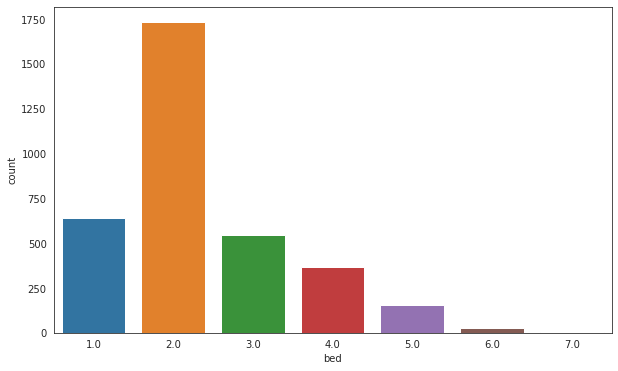

In [129]:
sns.set_style('white')
plt.figure(figsize=(10, 6))
sns.countplot(x="bed", data=house_info)

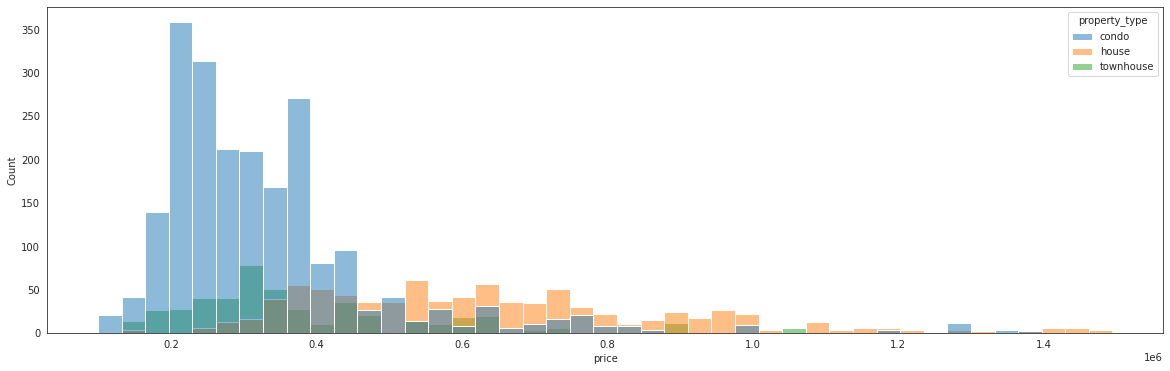

In [130]:
plt.figure(figsize=(20, 6))
sns.histplot(data=house_info, x="price", hue="property_type")

# **Data Wrangling**

In [131]:
house_info.isnull().sum()

price                   0
address                 0
bed                    12
full_bath              12
half_bath            2356
property_area           6
property_type          36
latitude                0
longitude               0
year_built            465
years_old             465
distance_downtown       0
monthly_payments      130
lot_size             2225
basement                0
garage                  0
postal_code             0
walk_score             16
bike_score             16
transit_score          58
dtype: int64

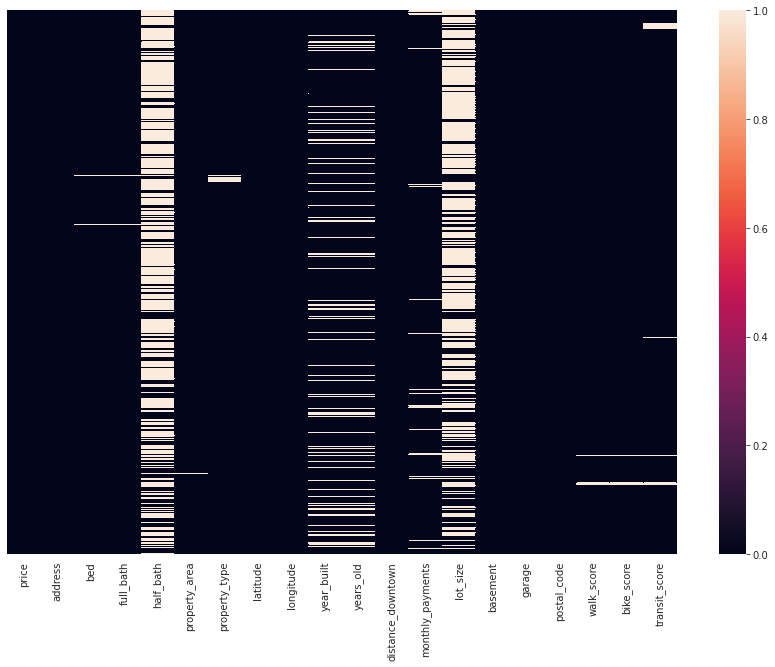

In [133]:
sns.set_style('white')
plt.figure(figsize=(15, 10))
sns.heatmap(data=house_info.isnull(), yticklabels=False)

In [134]:
# Replace nan values with average years_old and 0

house_info['years_old']=house_info['years_old'].replace(np.nan,house_info['years_old'].mean())
house_info['half_bath']=house_info['half_bath'].replace(np.nan,0)
# house_info['lot_size']=house_info['lot_size'].replace(np.nan,0)
house_info['walk_score']=house_info['walk_score'].replace(np.nan,0)
house_info['bike_score']=house_info['bike_score'].replace(np.nan,0)
house_info['transit_score']=house_info['transit_score'].replace(np.nan,0)
house_info = house_info.dropna(subset=['bed', 'full_bath', 'property_area', 'property_type'])

In [135]:
del house_info["lot_size"]

In [136]:
house_info.isnull().sum()

price                  0
address                0
bed                    0
full_bath              0
half_bath              0
property_area          0
property_type          0
latitude               0
longitude              0
year_built           463
years_old              0
distance_downtown      0
monthly_payments     130
basement               0
garage                 0
postal_code            0
walk_score             0
bike_score             0
transit_score          0
dtype: int64

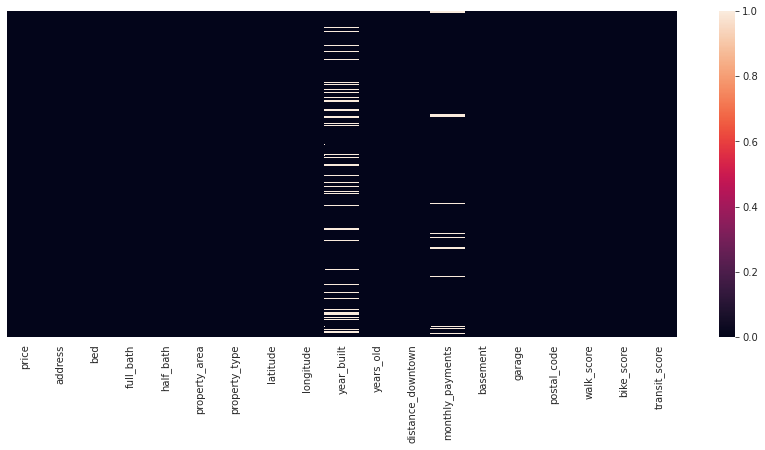

In [137]:
sns.set_style('white')
plt.figure(figsize=(15, 6))
sns.heatmap(data=house_info.isnull(), yticklabels=False)

In [138]:
house_info.head()

,price,address,bed,full_bath,half_bath,property_area,property_type,latitude,longitude,year_built,years_old,distance_downtown,monthly_payments,basement,garage,postal_code,walk_score,bike_score,transit_score
0,265000,303 - 515 4 AVE NE,2.0,2.0,0.0,601.0,condo,51.055663,-114.051665,2016.0,4.000000,1.96207,1145.89,0.0,0.0,T2E 0J9,69.0,98.0,63.0
1,265000,303 - 515 4 AVE NE,2.0,2.0,0.0,601.0,condo,51.055663,-114.051665,1995.0,25.000000,1.96207,1145.89,0.0,0.0,T2E 0J9,69.0,98.0,63.0
2,265000,303 - 515 4 AVE NE,2.0,2.0,0.0,601.0,condo,51.055663,-114.051665,1999.0,21.000000,1.96207,1145.89,0.0,0.0,T2E 0J9,69.0,98.0,63.0
3,265000,303 - 515 4 AVE NE,2.0,2.0,0.0,601.0,condo,51.055663,-114.051665,2005.0,15.000000,1.96207,NaN,0.0,0.0,T2E 0J9,69.0,98.0,63.0
4,265000,303 - 515 4 AVE NE,2.0,2.0,0.0,601.0,condo,51.055663,-114.051665,NaN,41.512599,1.96207,NaN,0.0,0.0,T2E 0J9,69.0,98.0,63.0


# **One-hot encoding**

In [139]:
prop_area = pd.get_dummies(house_info["property_type"])
prop_area.head()

,condo,house,townhouse
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


## **Merge tables**

In [140]:
table_df = pd.concat([house_info, prop_area], axis=1)
table_df.head()

,price,address,bed,full_bath,half_bath,property_area,property_type,latitude,longitude,year_built,years_old,distance_downtown,monthly_payments,basement,garage,postal_code,walk_score,bike_score,transit_score,condo,house,townhouse
0,265000,303 - 515 4 AVE NE,2.0,2.0,0.0,601.0,condo,51.055663,-114.051665,2016.0,4.000000,1.96207,1145.89,0.0,0.0,T2E 0J9,69.0,98.0,63.0,1,0,0
1,265000,303 - 515 4 AVE NE,2.0,2.0,0.0,601.0,condo,51.055663,-114.051665,1995.0,25.000000,1.96207,1145.89,0.0,0.0,T2E 0J9,69.0,98.0,63.0,1,0,0
2,265000,303 - 515 4 AVE NE,2.0,2.0,0.0,601.0,condo,51.055663,-114.051665,1999.0,21.000000,1.96207,1145.89,0.0,0.0,T2E 0J9,69.0,98.0,63.0,1,0,0
3,265000,303 - 515 4 AVE NE,2.0,2.0,0.0,601.0,condo,51.055663,-114.051665,2005.0,15.000000,1.96207,NaN,0.0,0.0,T2E 0J9,69.0,98.0,63.0,1,0,0
4,265000,303 - 515 4 AVE NE,2.0,2.0,0.0,601.0,condo,51.055663,-114.051665,NaN,41.512599,1.96207,NaN,0.0,0.0,T2E 0J9,69.0,98.0,63.0,1,0,0


In [141]:
df = table_df[['price', 'bed', 'full_bath', 'half_bath', 'property_area', 'condo',
                 'house', 'townhouse', 'years_old', 'distance_downtown', 'walk_score', 'bike_score', 'transit_score', 'basement', 'garage']]
df.head()

,price,bed,full_bath,half_bath,property_area,condo,house,townhouse,years_old,distance_downtown,walk_score,bike_score,transit_score,basement,garage
0,265000,2.0,2.0,0.0,601.0,1,0,0,4.000000,1.96207,69.0,98.0,63.0,0.0,0.0
1,265000,2.0,2.0,0.0,601.0,1,0,0,25.000000,1.96207,69.0,98.0,63.0,0.0,0.0
2,265000,2.0,2.0,0.0,601.0,1,0,0,21.000000,1.96207,69.0,98.0,63.0,0.0,0.0
3,265000,2.0,2.0,0.0,601.0,1,0,0,15.000000,1.96207,69.0,98.0,63.0,0.0,0.0
4,265000,2.0,2.0,0.0,601.0,1,0,0,41.512599,1.96207,69.0,98.0,63.0,0.0,0.0


In [142]:
df.dtypes

price                  int64
bed                  float64
full_bath            float64
half_bath            float64
property_area        float64
condo                  uint8
house                  uint8
townhouse              uint8
years_old            float64
distance_downtown    float64
walk_score           float64
bike_score           float64
transit_score        float64
basement             float64
garage               float64
dtype: object

## **Train Data**

In [144]:
X = df.drop('price', axis=1)
y = df['price']

In [145]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [146]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)



#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train_minmax,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
top_features = featureScores.nlargest(10,'Score')
print(top_features)  #print best features

            Specs        Score
5           house  1442.815564
6       townhouse  1420.303179
12       basement  1282.556007
4           condo   706.846164
2       half_bath   673.546224
13         garage   634.008223
1       full_bath   368.404653
9      walk_score   308.320990
0             bed   291.221939
3   property_area   256.415885


In [147]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [148]:
# Fit the model to the training data and calculate the score for the training data

model.fit(X_train_minmax, y_train)
training_score = model.score(X_train_minmax, y_train)

print(f"Training Score: {training_score}")

Training Score: 0.7168623257284921


## **Test Data**

In [149]:
# Calculate the score for the testing data

testing_score = model.score(X_test_minmax, y_test)
print(f"Testing Score: {testing_score}")

Testing Score: 0.7183666728706375


## **Linear Regression Model**

In [150]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
regr.coef_

array([-2.89462794e+03,  5.58996864e+04, -9.77592120e+02,  2.51318635e+02,
       -5.90209583e+04,  1.07852090e+05, -4.88311313e+04,  6.47057834e+00,
       -7.32888127e+03,  3.31926472e+02, -3.22577459e+02,  6.73282522e+02,
       -9.46641679e+04,  1.26164825e+04])

In [152]:
regr.intercept_

80860.65034125018

In [154]:
# Predict the price of a townhouse with the following features

# bed = 3
# full_bath = 2
# half_bath = 0
# property_area = 1500
# years_old = 15
# distance_downtown = 12.554

regr.predict([[3, 2, 0, 1500, 0, 0, 1, 15, 12.554, 50, 50, 50, 0, 0]])

array([454344.82032758])

In [155]:
# Another sample

regr.predict([[3, 3, 0, 1200, 0, 0, 1, 15, 14.2, 50, 50, 50, 0, 0]])

array([422785.57774262])

Text(0.5, 1.0, 'Residual Plot')

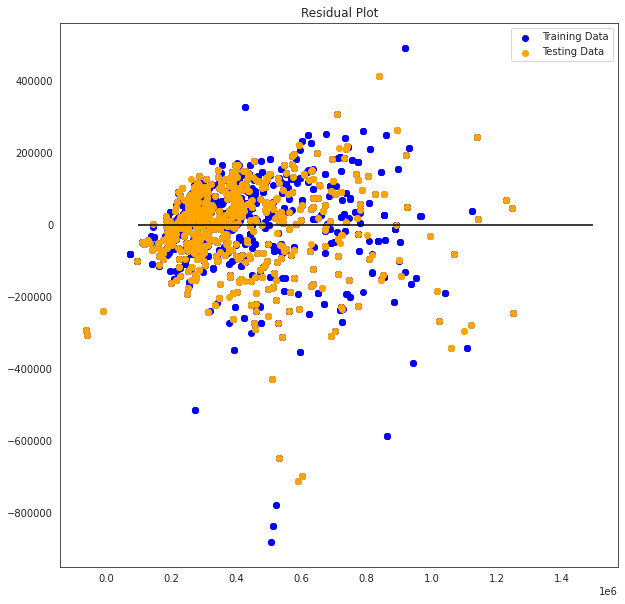

In [157]:
# Plot the Residuals for the Training and Testing data

plt.figure(figsize=(10, 10))
plt.scatter(model.predict(X_train_minmax), model.predict(X_train_minmax) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_minmax), model.predict(X_test_minmax) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")